# Analysis on Indian Premier League

Indian Premier League is a famous cricket league played in India every year during the period between March and May. It is played in a professional T20 format of the game. This league is played by 8 teams representing 8 different cities across India. This league started in 2008 and it has been a big hit and it is the most attended league in the World. Each team with their profit buys best players from across the World. It is also one of the big reason behind Indian team's success as the league brings out the best talent from a billion population in India. 

This notebook performs in depth analysis on the matches played during the Indian Premier League using the CRISP-DM structure. The data covers 10 seasons and includes ball-by-ball data. The dataset is from Kaggle ([https://www.kaggle.com/manasgarg/ipl](source)).

The notebook further will find the answers for the following question.

- What makes the format and league so popular?
- As this is high scoring format of the game, who are winning the high scoring games?
- Which bowlers can thrive well in powerplays and death overs?


In [1]:
#version of python used in this notebook
!python --version 

Python 3.7.1


In [2]:
#importing required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Data Understanding

#### Matches data

In [3]:
#loading data from the data folder called 'ipl'
matchdf = pd.read_csv('ipl/matches.csv')
deliverydf = pd.read_csv('ipl/deliveries.csv')

In [4]:
#shape and columns in the dataframe
print(matchdf.columns)
print(matchdf.shape)

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')
(636, 18)


In [5]:
matchdf.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


The matches CSV file contains high level records of the matches played and the outcome of matches played in each season. Let us further explore the missing values in the dataset.

#### Deliveries data

In [6]:
print(deliverydf.columns)
print(deliverydf.shape)

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')
(150460, 21)


In [7]:
deliverydf.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


This data consists a very low data of each ball bowled during the game and who bowled and played the ball and what happened during each ball. Let us look at the missing values in this dataframe.

## Data Preparation

In [8]:
matchdf.isnull().any()

id                 False
season             False
city                True
date               False
team1              False
team2              False
toss_winner        False
toss_decision      False
result             False
dl_applied         False
winner              True
win_by_runs        False
win_by_wickets     False
player_of_match     True
venue              False
umpire1             True
umpire2             True
umpire3             True
dtype: bool

In [9]:
#sum of missing values in each column
matchdf.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

The values missing in the dataset is very less and it will not affect our analysis. The column 'umpire3' has 636 rows missing. As it will not be a part of my analysis, I am not doing anything with the missing values.

In [10]:
deliverydf.isnull().any()

match_id            False
inning              False
batting_team        False
bowling_team        False
over                False
ball                False
batsman             False
non_striker         False
bowler              False
is_super_over       False
wide_runs           False
bye_runs            False
legbye_runs         False
noball_runs         False
penalty_runs        False
batsman_runs        False
extra_runs          False
total_runs          False
player_dismissed     True
dismissal_kind       True
fielder              True
dtype: bool

In [11]:
#sum of missing values in each column
deliverydf.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    143022
dismissal_kind      143022
fielder             145091
dtype: int64

The last three columns does not contain any data and hence, we can drop those columns.

In [12]:
#dropping three empty columns
deliverydf.drop(['player_dismissed', 'dismissal_kind', 'fielder'],axis=1, inplace=True)

By assessing the data, the data does not have much cleaning issues. The deliveries data is very granular and I can sense there will be lot of rolling up and aggregration carried out to get insights out of this dataset.


As the analysis we are going to carry out is mostly upon deliveries, it is good to merge the required columns like season from matches dataframe to deliveries dataframe. This will make aggregation steps easier. Also, we will rename the team names with abbreviations for more readability on 

In [13]:
#merge season value from the matches dataframe to deliveries
runs = matchdf[['id','season']].merge(deliverydf, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)

In [14]:
#replace team names with abbreviations for more readability in plots and tables
runs.replace(['Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['DD','GL','KXIP','SRH','RPS','MI','KKR','RCB','DC','CSK','RR','KTK','PW','RPS'],inplace=True)

## Data Modeling/Analysis

### What makes the format and league so popular?

In [15]:
def barplot(x_axis, y_axis, plot_data, title, x_label, y_label):
    """Bar plot using seaborn library"""
    plot = sns.barplot(x=x_axis, y=y_axis, data=plot_data)
    plot.set(xlabel=x_label, ylabel=y_label)
    plot.set_title(title)
    plt.show()

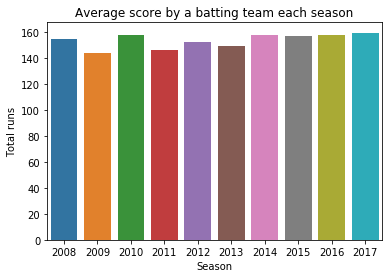

In [16]:
#get the average score by a batting team in each season
innings_score = runs.groupby(['match_id', 'season', 'batting_team'])['total_runs'].sum().reset_index()
season_avg_score = innings_score.groupby(['season'])['total_runs'].mean().reset_index()
#bar plot
barplot('season', 'total_runs', season_avg_score, 'Average score by a batting team each season',
        'Season', 'Total runs')

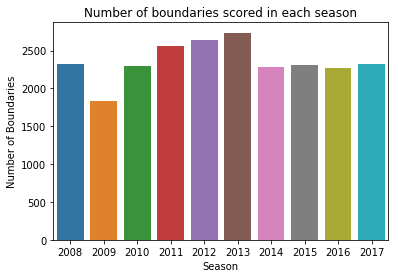

In [17]:
#number of 4s and 6s scored boundaries scored in each season
boundaries_per_season = runs[(runs['batsman_runs']==4) | (runs['batsman_runs']==6)].groupby(['season'])['batsman_runs'].count().reset_index()
#barplot
barplot('season', 'batsman_runs', boundaries_per_season, 'Number of boundaries scored in each season',
        'Season', 'Number of Boundaries')

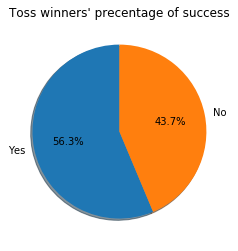

In [18]:
#obtain toss winners in the match
winner = matchdf[matchdf['toss_winner']==matchdf['winner']]
labels=['Yes','No']
#pie plot
plt.pie([len(winner),(577-len(winner))],labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
plot = plt.gcf()
plt.title("Toss winners' precentage of success")
plt.show()

From the above 3 plots, we can conclude three reasons behind the popularity behind the league and format.
1. High average score in each inning every season

Usually in a 50 over or a test match, the run rate will not be as high as this format. Here, average innings score will be more than 140 in 120 balls played.

2. Very high number of boundaries scored

In each season, more than 2000 boundaries (4s and 6s) are scored which is another reason for high score games and this makes the match interesting to watch. Less number of boundaries in the year 2009 can be attributed to the location of the league played at. In 2009, IPL was hosted by South Africa and it was not a big hit as the pitches in South Africa were not suitable for scoring many runs/boundaries.

3. Unpredictability of a match

In a cricket game, toss is a major factor as the team winning the toss have high chances of winning. But from the plot, we can conclude that the match can go either way where toss winners have very slight edge.

All the above reasons can make a match very interesting and can attract lot of cricket fans.

### As this is high scoring format of the game, who are winning the high scoring games?

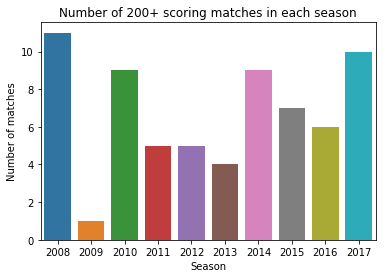

In [19]:
#get sum of scores by batting and bowling teams
high_scores = runs.groupby(['match_id','season','inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
#slice by runs greater than 200
high_scores = high_scores[high_scores['total_runs']>=200]

#bar plot
barplot('season', 'match_id', high_scores.groupby(['season'])['match_id'].count().reset_index(), 
        'Number of 200+ scoring matches in each season', 'Season', 'Number of matches')

From the above plot, the first season had more than 10 200+ scores which contributes to the league's immediate success. The second season has the lowest as it was hosted in South Africa. The Board of Cricket Council India(BCCI) did not make much profit that year (Source: [https://economictimes.indiatimes.com/ipl-t20-2009-had-plunged-bccis-profits-to-rs-21-2-crore/articleshow/9950220.cms]). So, high scores in matches does contribute to success of the league.

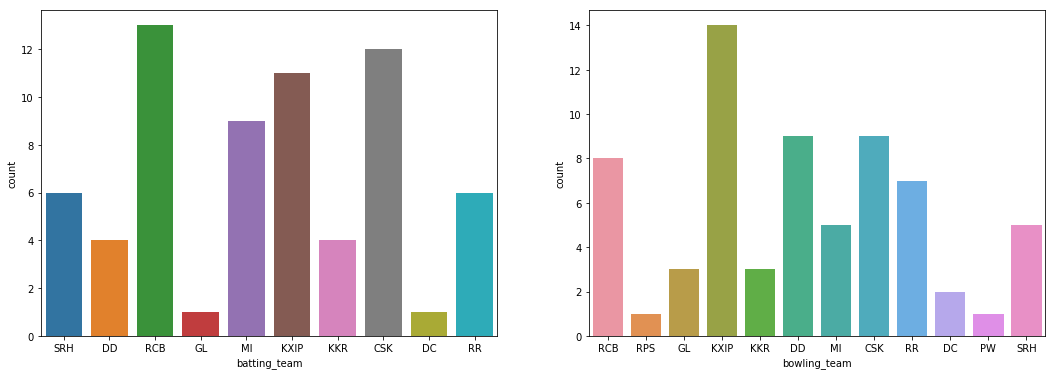

In [20]:
#count plots comparing scoring and conceding teams
plot, ax =plt.subplots(1,2)
sns.countplot(high_scores['batting_team'],ax=ax[0])
sns.countplot(high_scores['bowling_team'],ax=ax[1])
plot=plt.gcf()
plot.set_size_inches(18,6)
plt.show()

The above plots shows the number of times a team have scored and conceded 200+ runs. Interestingly, some teams have only conceded 200+ runs but not scored them like RPS(Rising Pune Supergiants) and PW(Pune Warriors). Both are actually the same team as the latter team was renamed as RPS.

This also makes us think about the order of innings played. I wonder whether the teams batting second can actually acquire the target if it is 200+.

Let us explore the success rate chasing 200+ as well.

In [21]:
high_scores = deliverydf.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
#high score in 1st innings
firstinning_scores = high_scores[high_scores['inning']==1]
#high score in 2nd innings
secondinning_scores = high_scores[high_scores['inning']==2]
#merge to get complete mach scores
fullmatch_scores = firstinning_scores.merge(secondinning_scores[['match_id', 'inning', 'total_runs']], on='match_id')

In [22]:
#rename columns based on 1st and 2nd innings
fullmatch_scores.rename(columns={'inning_y':'inning_2','total_runs_x':'inning1_runs','inning_x':'inning_1','total_runs_y':'inning2_runs'},inplace=True)
fullmatch_scores = fullmatch_scores[fullmatch_scores['inning1_runs']>=200]

#engineer new column to get if the score was chased successfully or not
fullmatch_scores['chase_success'] = 1
fullmatch_scores['chase_success'] = np.where(fullmatch_scores['inning1_runs']<=fullmatch_scores['inning2_runs'], 'yes', 'no')

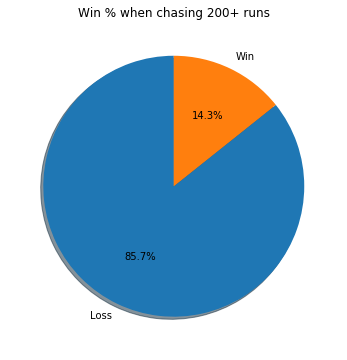

In [32]:
#pie plot success rate of teams batting second
counts = fullmatch_scores['chase_success'].value_counts().reset_index().chase_success
labels = ['Loss','Win']
plt.pie(counts,labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
plot = plt.gcf()
plot.set_size_inches(6,6)
plt.title("Win % when chasing 200+ runs")
plt.show()

Voila! When a team is chasing 200+ runs, it is mostly one-sided match. There is only 14.3% chances of winning when a team chases 200+ score. 

### Which bowlers can thrive well in powerplays and death overs?

We have explored too much about scoring runs and high targets. We can safely say this league/format gives more importance for batting, unlike Tests and ODIs. But, one cannot forget the bowlers as they are the ones taking wickets and conceding. 

In T20 format, as you have 10 wickets for 20 overs, it gives batsman more freedom to take risks and hit boundaries. Batsman tend to hit more during [powerplays](https://en.wikipedia.org/wiki/Powerplay_(cricket)#Twenty20) and death overs. So, teams will try to concede during first 6 overs and last 4 overs. 

We will see as to who can concede very less runs in these overs and these players have a good rate when it comes to auctions.

In [24]:
#slice data for first 6 overs
powerplay_deliveries = runs[runs['over'] <=6].reset_index()

We will need to introduce a new column called 'Economy rate'. 

This is calculated using the formula: **Total runs conceded/Total overs bowled**

We can do an analysis on how many total powerplay and death overs they have bowled and their conceding rate. Less economy rate means the bowler is containing the batsman from hitting more runs.

In [25]:
bowlers = powerplay_deliveries.groupby(["bowler", "over", "match_id", "season"]).sum().reset_index()
#engineer new column showing total number of overs bowled 
bowlers["total_overs"] = 1
bowlers = bowlers[["bowler", "total_overs", "total_runs", "season"]]
bowlers = bowlers.groupby(["bowler","season"]).sum().reset_index()
#engineer new column showing the economy rate of the bowler
bowlers["economy_rate"] = bowlers.apply(lambda row: "{:.2f}".format(row["total_runs"] / row["total_overs"]), axis=1)
bowlers.head()

,bowler,season,total_overs,total_runs,economy_rate
0,A Ashish Reddy,2012,1,20,20.00
1,A Chandila,2012,7,41,5.86
2,A Chandila,2013,17,98,5.76
3,A Choudhary,2017,6,46,7.67
4,A Flintoff,2009,2,21,10.50


In [26]:
# all time best economic bowlers during powerplay
bowlers.nlargest(10, 'total_overs').sort_values(by=["economy_rate"], ascending=[True])

,bowler,season,total_overs,total_runs,economy_rate
539,P Kumar,2013,37,214,5.78
251,GD McGrath,2008,37,218,5.89
127,B Kumar,2016,36,218,6.06
471,MG Johnson,2013,39,243,6.23
488,MM Sharma,2013,36,230,6.39
538,P Kumar,2012,43,278,6.47
542,P Kumar,2016,38,253,6.66
24,A Nehra,2015,42,297,7.07
286,I Sharma,2013,38,278,7.32
501,MS Gony,2008,45,342,7.60


All time economic bowler is Bhuvaneshwar Kumar. This inference is good but it across all seasons. It is good for the records board but we need see across all seasons. Not all bowlers play every season. 

So, we can see the top 5 bowling performances across all seasons.

In [27]:
# top 5 economic bowlers in each season
x, y = 2008, 2017
while x < y:
    print(bowlers[bowlers["season"]==x].nlargest(5, 'total_overs').sort_values(by=["economy_rate"], ascending=[True]))
    x+=1

          bowler  season  total_overs  total_runs economy_rate
251   GD McGrath    2008           37         218         5.89
742   SM Pollock    2008           34         213         6.26
752    SR Watson    2008           32         221         6.91
501      MS Gony    2008           45         342         7.60
694  S Sreesanth    2008           36         293         8.14
        bowler  season  total_overs  total_runs economy_rate
652   RP Singh    2009           35         233         6.66
19     A Nehra    2009           28         190         6.79
350  JH Kallis    2009           29         205         7.07
295  IK Pathan    2009           27         199         7.37
326  JA Morkel    2009           28         219         7.82
       bowler  season  total_overs  total_runs economy_rate
595  R Ashwin    2010           22         115         5.23
536   P Kumar    2010           28         210         7.50
240  DW Steyn    2010           27         204         7.56
867    Z Khan   

As expected, these statistics are different and it can give an idea as to who is performing consistently across seasons like Praveen Kumar and Bhuvaneshwar Kumar.


Now, let us look at the bowling in death overs, this is very crucial in a match as batsman will try to increase/acquire the target by hitting big runs in these over where they have more wickets in hand.

In [28]:
#slice data for death overs
deathovers_deliveries = runs[runs['over'] >=16].reset_index()

In [29]:
bowlers = deathovers_deliveries.groupby(["bowler", "over", "match_id","season"]).sum().reset_index()
#engineer new column showing total number of overs bowled 
bowlers["total_overs"] = 1
bowlers = bowlers[["bowler", "total_overs", "total_runs","season"]]
bowlers = bowlers.groupby(["bowler", "season"]).sum().reset_index()
#engineer new column showing the economy rate of the bowler
bowlers["economy_rate"] = bowlers.apply(lambda row: "{:.2f}".format(row["total_runs"] / row["total_overs"]), axis=1)
bowlers.head()

,bowler,season,total_overs,total_runs,economy_rate
0,A Ashish Reddy,2012,13,124,9.54
1,A Ashish Reddy,2013,2,25,12.50
2,A Ashish Reddy,2015,3,20,6.67
3,A Chandila,2013,1,6,6.00
4,A Choudhary,2017,4,40,10.00


In [30]:
#all time economic bowlers during the death overs
bowlers.nlargest(10, 'total_overs').sort_values(by=["economy_rate"], ascending=[False])

,bowler,season,total_overs,total_runs,economy_rate
127,B Kumar,2016,27,259,9.59
357,JJ Bumrah,2017,28,241,8.61
197,DJ Bravo,2015,36,303,8.42
368,JP Faulkner,2013,26,207,7.96
196,DJ Bravo,2013,37,286,7.73
518,Mustafizur Rahman,2016,27,208,7.70
736,SL Malinga,2013,27,205,7.59
745,SP Narine,2012,27,185,6.85
747,SP Narine,2014,28,189,6.75
198,DJ Bravo,2016,27,307,11.37


One might expect a bowler who does well in first 6 overs to do well in death overs. Interestingly that is not the case except for Bhuvaneshwar Kumar. We have a totally different set of bowlers here like Malinga, Bumrah and Bravo.
Let us see how they have fared across each season.

In [31]:
#economic bowlers during the death over in each season
x, y = 2008, 2017
while x < y:
    print(bowlers[bowlers["season"]==x].nlargest(5, 'total_overs').sort_values(by=["economy_rate"], ascending=[True]))
    x+=1

            bowler  season  total_overs  total_runs economy_rate
419       L Balaji    2008           15         150        10.00
658       RP Singh    2008           17         176        10.35
790  Sohail Tanvir    2008           18         122         6.78
835      VRV Singh    2008           15         133         8.87
323      JA Morkel    2008           15         141         9.40
         bowler  season  total_overs  total_runs economy_rate
732  SL Malinga    2009           22         135         6.14
659    RP Singh    2009           22         163         7.41
25      A Nehra    2009           18         135         7.50
294   IK Pathan    2009           23         195         8.48
214   DP Nannes    2009           17         147         8.65
            bowler  season  total_overs  total_runs economy_rate
626  R Vinay Kumar    2010           16         165        10.31
295      IK Pathan    2010           16         170        10.62
733     SL Malinga    2010           19    

Few bowlers like Malinga, Bravo, B Kumar are consistent across all seasons. These players must be star bowlers and will definitely go under a high rate in auctions.

## Future Scope

Cricket is an interesting sport where we saw a number of factors that can affect a game's outcome. There are a lot more like this.

Just with the deliveries data, there are so many insights we can achieve. With more data, like the auction data, we can decide which teams can do better with which players. 

We can also predict information such as the win probability each over and it can be useful for betting industries.